In [1]:

from allen_data_driven import opt_setup, opt_setup_two, opt_exec, opt_to_model
from neuronunit.optimisation.optimization_management import check_bin_vm15
from neuronunit.optimisation.model_parameters import MODEL_PARAMS, BPO_PARAMS, to_bpo_param
from neuronunit.optimisation.optimization_management import dtc_to_rheo,inject_and_plot_model
from allen_data_driven import opt_to_model
from utils import dask_map_function
import matplotlib.pyplot as plt
import numpy as np
from neuronunit.optimisation.data_transport_container import DataTC


#specimen_id = 324257146
specimen_id = 325479788
#specimen_id = 476053392
#specimen_id = 623893177
#specimen_id = 623960880
#specimen_id = 482493761
#specimen_id = 471819401
import efel
efel.__file__
efel_list = list(efel.getFeatureNames());


test


In [2]:
from jithub.models import model_classes

cellmodel = "MAT";
if cellmodel == "IZHI":
    model = model_classes.IzhiModel()
elif cellmodel == "MAT":
    model = model_classes.MATModel()



specimen id 623960880 \\
{\small  
\url{http://celltypes.brain-map.org/mouse/experiment/electrophysiology/623960880}
specimen id 623893177 \\
\url{http://celltypes.brain-map.org/mouse/experiment/electrophysiology/623893177}
specimen id 482493761 \\
\url{http://celltypes.brain-map.org/mouse/experiment/electrophysiology/482493761}
specimen id 471819401 \\
\url{http://celltypes.brain-map.org/mouse/experiment/electrophysiology/471819401}


In [3]:
specific_filter_list = ['ISI_log_slope_1.5x',
                        'mean_frequency_1.5x',
                        'adaptation_index2_1.5x',
                        'first_isi_1.5x',
                        'ISI_CV_1.5x',
                        'median_isi_1.5x',
                        'AHP_depth_abs_1.5x',
                        'sag_ratio2_1.5x',
                        'ohmic_input_resistance_1.5x',
                        'sag_ratio2_1.5x',
                        'peak_voltage_1.5x',
                        'voltage_base_1.5x',
                        'Spikecount_1.5x',
                        'all_ISI_values',
                        'ISI_values',
                        'time_to_first_spike',
                        'time_to_last_spike',
                        'time_to_second_spike',
                        'voltage',
                        'spike_times']
simple_yes_list = specific_filter_list
target_num_spikes = 6


In [4]:
dtc = DataTC()
dtc.backend = cellmodel
dtc._backend = model._backend

dtc.attrs = model.attrs
dtc.params = {k:np.mean(v) for k,v in MODEL_PARAMS[cellmodel].items()}
dtc.attrs

{'vr': -65.0,
 'vt': -55.0,
 'a1': 10,
 'a2': 2,
 'b': 0,
 'w': 5,
 'R': 10,
 'tm': 10,
 't1': 10,
 't2': 200,
 'tv': 5,
 'tref': 2}

In [5]:


dtc = dtc_to_rheo(dtc)
print(dtc.rheobase)
print(dtc.backend)


#dtc_to_rheo()

0.5000000006475602 pA
MAT


[-42.00804688] mV [ True]


<Figure size 432x288 with 0 Axes>

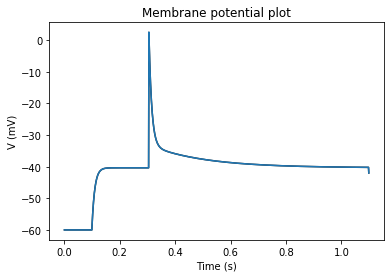

0.5000000006475602 pA


In [6]:
vm,plt,dtc = inject_and_plot_model(dtc,plotly=False)
plt.show()
print(dtc.rheobase)
#builtins.print = print_wrap

In [7]:
#model = mat

0 6
0 6
0 6
0 6
0 6
1 6
0 6
1 6
9 6
yes hit


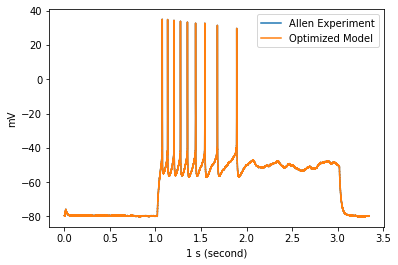

In [8]:
model.params
model.backend
model, suite, nu_tests, target_current, spk_count = opt_setup(specimen_id,
                                                              cellmodel,
                                                              target_num_spikes,provided_model=model)


In [9]:

cell_evaluator2,simple_cell = opt_setup_two(model,cellmodel, suite, nu_tests, target_current, spk_count,provided_model=model)


In [10]:
target_current

{'value': array(0.59244792) * pA}

In [11]:
model.seeded_current = target_current['value']
model.allen = True
model.seeded_current
model.NU = True


In [12]:
#mat.NU = True
NGEN = 100
MU = 10

# TODO use pebble instead.
#builtins.print = print_wrap

mapping_funct = dask_map_function
final_pop, hall_of_fame, logs, hist = opt_exec(MU,NGEN,mapping_funct,cell_evaluator2)


In [13]:

opt,target = opt_to_model(hall_of_fame,cell_evaluator2,suite, target_current, spk_count)

In [14]:

#dir(cell_evaluator2)

In [15]:
best_ind = hall_of_fame[0]
fitnesses = cell_evaluator2.evaluate_with_lists(best_ind)
fitnesses;

In [16]:
best_ind

[nan,
 nan,
 21.62787437380254,
 4.301797181673036,
 0.0,
 3.316918035399105,
 10.13431434824481,
 37.2411540480406,
 10.651042917051265,
 245.44947096638035,
 19.45077633715789,
 -3.6674872278532415]

In [17]:
obnames = [obj.name for obj in cell_evaluator2.objectives]

for i,j in zip(fitnesses,obnames):
    print(i,j)

0.4628 burst_mean_freq_1.5x
1.0 burst_number_1.5x
1.624 single_burst_ratio_1.5x
0.01145 ISI_log_slope_1.5x
0.4965 mean_frequency_1.5x
0.01164 adaptation_index2_1.5x
0.01015 ISI_CV_1.5x
0.5155 AHP_depth_abs_1.5x
0.1708 sag_ratio2_1.5x
1.877 peak_voltage_1.5x
0.752 voltage_base_1.5x
0.0 Spikecount_1.5x
2.161 all_ISI_values_1.5x
2.164 ISI_values_1.5x
0.4021 time_to_first_spike_1.5x
2.014 time_to_last_spike_1.5x
1.161 time_to_second_spike_1.5x
0.5254 voltage_1.5x
1.336 spike_times_1.5x


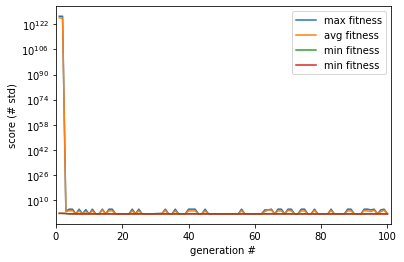

In [18]:
#for obj in cell_evaluator2.objectives:
#    print(obj.name)

gen_numbers = logs.select('gen')
min_fitness = logs.select('min')
max_fitness = logs.select('max')
avg_fitness = logs.select('avg')
plt.plot(gen_numbers, max_fitness, label='max fitness')
plt.plot(gen_numbers, avg_fitness, label='avg fitness')
plt.plot(gen_numbers, min_fitness, label='min fitness')

plt.plot(gen_numbers, min_fitness, label='min fitness')
plt.semilogy()
plt.xlabel('generation #')
plt.ylabel('score (# std)')
plt.legend()
plt.xlim(min(gen_numbers) - 1, max(gen_numbers) + 1)
plt.show()

{'vr': nan,
 'vt': nan,
 'a1': 21.62787437380254,
 'a2': 4.301797181673036,
 'b': 0.0,
 'w': 3.316918035399105,
 'R': 10.13431434824481,
 'tm': 37.2411540480406,
 't1': 10.651042917051265,
 't2': 245.44947096638035,
 'tv': 19.45077633715789,
 'tref': -3.6674872278532415}

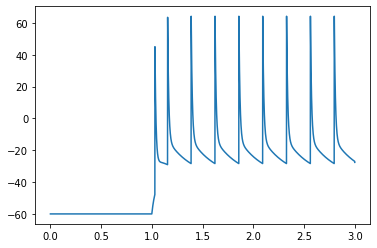

In [19]:
opt.attrs

model = opt.dtc_to_model()
plt.plot(opt.vm15.times,opt.vm15)
opt.vm15
opt.attrs


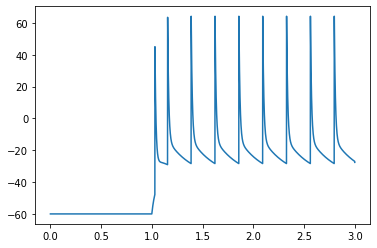

{'vr': nan,
 'vt': nan,
 'a1': 21.62787437380254,
 'a2': 4.301797181673036,
 'b': 0.0,
 'w': 3.316918035399105,
 'R': 10.13431434824481,
 'tm': 37.2411540480406,
 't1': 10.651042917051265,
 't2': 245.44947096638035,
 'tv': 19.45077633715789,
 'tref': -3.6674872278532415}

In [20]:
#check_bin_vm15(opt,opt)

import matplotlib.pyplot as plt

plt.plot(opt.vm15.times,opt.vm15)
plt.show()


#check_bin_vm30(target,target)

opt.attrs


In [21]:
opt.vm15.units

#opt.vm15 = opt.vm15.rescale('mV').magnitude


array(1.) * mV

In [22]:
target_current

{'value': array(0.59244792) * pA}

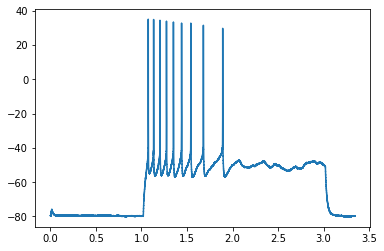

In [23]:
#target.vm15
target.vm15 = suite.traces['vm15']

plt.plot(target.vm15.times,target.vm15)
plt.show()


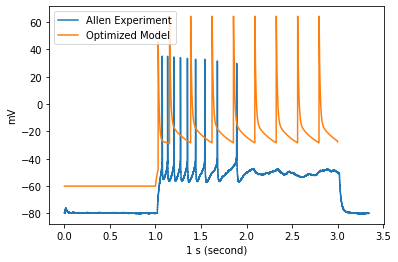

In [24]:
target.vm15 = suite.traces['vm15']

check_bin_vm15(target,opt)




In [25]:
'''
import bluepyopt as bpop
from utils import dask_map_function
optimisation = bpop.optimisations.DEAPOptimisation(
        evaluator=cell_evaluator2,
        offspring_size = MU,
        map_function = dask_map_function,
        selector_name='IBEA',mutpb=0.1,cxpb=0.35,seeded_pop=[cp['final_pop'],cp['hall_of_fame']])#,seeded_current=target_current)
final_pop, hall_of_fame, logs, hist = optimisation.run(max_ngen=50)
'''

"\nimport bluepyopt as bpop\nfrom utils import dask_map_function\noptimisation = bpop.optimisations.DEAPOptimisation(\n        evaluator=cell_evaluator2,\n        offspring_size = MU,\n        map_function = dask_map_function,\n        selector_name='IBEA',mutpb=0.1,cxpb=0.35,seeded_pop=[cp['final_pop'],cp['hall_of_fame']])#,seeded_current=target_current)\nfinal_pop, hall_of_fame, logs, hist = optimisation.run(max_ngen=50)\n"

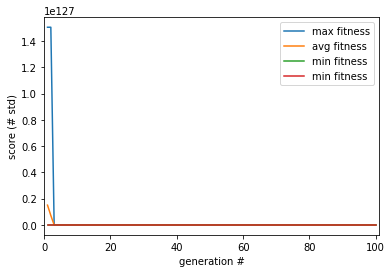

In [26]:
gen_numbers = logs.select('gen')
min_fitness = logs.select('min')
max_fitness = logs.select('max')
avg_fitness = logs.select('avg')
plt.plot(gen_numbers, max_fitness, label='max fitness')
plt.plot(gen_numbers, avg_fitness, label='avg fitness')
plt.plot(gen_numbers, min_fitness, label='min fitness')

plt.plot(gen_numbers, min_fitness, label='min fitness')
#plt.semilogy()
plt.xlabel('generation #')
plt.ylabel('score (# std)')
plt.legend()
plt.xlim(min(gen_numbers) - 1, max(gen_numbers) + 1)
plt.show()


In [27]:
for obj in cell_evaluator2.objectives:
    print(obj.name)


burst_mean_freq_1.5x
burst_number_1.5x
single_burst_ratio_1.5x
ISI_log_slope_1.5x
mean_frequency_1.5x
adaptation_index2_1.5x
ISI_CV_1.5x
AHP_depth_abs_1.5x
sag_ratio2_1.5x
peak_voltage_1.5x
voltage_base_1.5x
Spikecount_1.5x
all_ISI_values_1.5x
ISI_values_1.5x
time_to_first_spike_1.5x
time_to_last_spike_1.5x
time_to_second_spike_1.5x
voltage_1.5x
spike_times_1.5x


In [28]:
import efel
simple_yes_list = list(efel.getFeatureNames())
simple_yes_list

['AHP1_depth_from_peak',
 'AHP2_depth_from_peak',
 'AHP_depth',
 'AHP_depth_abs',
 'AHP_depth_abs_slow',
 'AHP_depth_diff',
 'AHP_depth_from_peak',
 'AHP_slow_time',
 'AHP_time_from_peak',
 'AP1_amp',
 'AP1_begin_voltage',
 'AP1_begin_width',
 'AP1_peak',
 'AP1_width',
 'AP2_AP1_begin_width_diff',
 'AP2_AP1_diff',
 'AP2_AP1_peak_diff',
 'AP2_amp',
 'AP2_begin_voltage',
 'AP2_begin_width',
 'AP2_peak',
 'AP2_width',
 'AP_amplitude',
 'AP_amplitude_change',
 'AP_amplitude_diff',
 'AP_amplitude_from_voltagebase',
 'AP_begin_indices',
 'AP_begin_time',
 'AP_begin_voltage',
 'AP_begin_width',
 'AP_duration',
 'AP_duration_change',
 'AP_duration_half_width',
 'AP_duration_half_width_change',
 'AP_end_indices',
 'AP_fall_indices',
 'AP_fall_rate',
 'AP_fall_rate_change',
 'AP_fall_time',
 'AP_height',
 'AP_phaseslope',
 'AP_phaseslope_AIS',
 'AP_rise_indices',
 'AP_rise_rate',
 'AP_rise_rate_change',
 'AP_rise_time',
 'AP_width',
 'APlast_amp',
 'APlast_width',
 'BAC_maximum_voltage',
 'BAC_w

'trace_check'